In [32]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [13]:
import pandas as pd
import numpy as np
import os

def load_data(category, crypt_number, test_number):
    crypt_dataframes = []
    for mat_num in range(1, 4):
        file_name = f'crypt{crypt_number}/{category}_RF-crypt{crypt_number}_test{test_number}_mat{mat_num}.npy'
        file_path = os.path.join('.', file_name)
        matrix_data = np.load(file_path)

        # Check if matrix_data is 1-dimensional
        if matrix_data.ndim == 1:
            matrix_data = matrix_data.reshape(-1, 1)

        matrix_df = pd.DataFrame(matrix_data, columns=[f'Col_{i}' for i in range(matrix_data.shape[1])])
        crypt_dataframes.append(matrix_df)

    overall_file = f'crypt{crypt_number}/{category}_RF-crypt{crypt_number}_test{test_number}_overall.npy'
    overall_path = os.path.join('.', overall_file)
    overall_data = np.load(overall_path)

    # Check if overall_data is 1-dimensional
    if overall_data.ndim == 1:
        overall_data = overall_data.reshape(-1, 1)

    overall_df = pd.DataFrame(overall_data, columns=[f'Col_{i}' for i in range(overall_data.shape[1])])

    pdf_file = f'crypt{crypt_number}/{category}_RF-crypt{crypt_number}_test{test_number}_.pdf'
    pdf_path = os.path.join('.', pdf_file)

    crypt_dataframes.append(overall_df)

    return crypt_dataframes, pdf_path

def main():
    test_number = '2'  # Use the appropriate test number

    crypt_numbers = ['0', '1', '2']  # Add other crypt numbers as needed
    categories = ['COARSE', 'PARA', 'SMOOTH']

    for crypt_number in crypt_numbers:
        crypt_data_list = []
        for category in categories:
            data, pdf = load_data(category, crypt_number, test_number)
            crypt_data_list.extend(data)

            # You can now use the dataframes and paths as needed
            # For example, printing the first few rows of each dataframe
            print(f"\nCRYPT{crypt_number} - {category} Data:")
            for df in data:
                print(df.head())
            print(f"\nCRYPT{crypt_number} - {category} PDF Path: {pdf}")

        # crypt_data_list now contains the three dataframes for the current crypt
        # You can further process or analyze them as needed
        print(f"\nAll Dataframes for CRYPT{crypt_number}:")
        for df in crypt_data_list:
            print(df.head())

main()


CRYPT0 - COARSE Data:
      Col_0
0  0.000694
1  0.000447
2  0.000484
3  0.000524
4  0.000561
      Col_0
0  0.007243
1  0.016269
2  0.022159
3  0.026463
4  0.029662
      Col_0
0  0.001431
1  0.001771
2  0.002676
3  0.003590
4  0.004450
      Col_0
0  0.002570
1  0.005966
2  0.008276
3  0.010006
4  0.011319

CRYPT0 - COARSE PDF Path: ./crypt0/COARSE_RF-crypt0_test2_.pdf

CRYPT0 - PARA Data:
      Col_0
0  0.000694
1  0.000440
2  0.000451
3  0.000466
4  0.000484
      Col_0
0  0.007243
1  0.014038
2  0.017234
3  0.020062
4  0.022614
      Col_0
0  0.001431
1  0.001542
2  0.002092
3  0.002659
4  0.003221
      Col_0
0  0.002570
1  0.005118
2  0.006368
3  0.007494
4  0.008523

CRYPT0 - PARA PDF Path: ./crypt0/PARA_RF-crypt0_test2_.pdf

CRYPT0 - SMOOTH Data:
      Col_0
0  0.000694
1  0.000471
2  0.000548
3  0.000615
4  0.000673
      Col_0
0  0.007243
1  0.018505
2  0.026346
3  0.031499
4  0.035615
      Col_0
0  0.001431
1  0.001915
2  0.003236
3  0.004570
4  0.005857
      Col_0
0  0.

FileNotFoundError: [Errno 2] No such file or directory: './crypt1/COARSE_RF-crypt1_test2_mat1.npy'

In [26]:
import pandas as pd
import numpy as np
import os

# List of test names for reference
test_names = ['test2_mat2', 'test1_mat2', 'test6_mat1']

# Globally visible list to store crypt dataframes
crypt_data_list = []

def load_data(category, crypt_number, test_number, mat_num):
    file_name = f'crypt{crypt_number}/{category}_RF-crypt{crypt_number}_test{test_number}_mat{mat_num}.npy'
    file_path = os.path.join('.', file_name)
    matrix_data = np.load(file_path)

    # Check if matrix_data is 1-dimensional
    if matrix_data.ndim == 1:
        matrix_data = matrix_data.reshape(-1, 1)

    matrix_df = pd.DataFrame(matrix_data, columns=[file_name])
    return matrix_df

def main():
    # Crypt numbers and test numbers for each case
    crypt_numbers = ['0', '1', '2']
    test_numbers = ['2', '1', '6']
    mat_numbers = ['2', '2', '1']  # Load only mat2 for now

    global crypt_data_list  # Use the globally visible list

    for i in range(len(crypt_numbers)):
        crypt_data_sublist = []  # List for each crypt
        for category in ['coarse', 'smooth', 'para']:
            data = load_data(category, crypt_numbers[i], test_numbers[i], mat_numbers[i])
            crypt_data_sublist.append(data)
            print(f"\nCRYPT{crypt_numbers[i]} - {category} Data for {test_names[i]}:")
            print(data.head())

        # Append the sublist for the current crypt to the global list
        crypt_data_list.append(crypt_data_sublist)

    # Example: Accessing the data for crypt 0, test 2, mat 2, COARSE
    print("\nExample: Accessing data for CRYPT0, TEST2_MAT2, COARSE:")
    print(crypt_data_list[0][0][0].head())



main()


CRYPT0 - coarse Data for test2_mat2:
   crypt0/coarse_RF-crypt0_test2_mat2.npy
0                                0.007243
1                                0.016269
2                                0.022159
3                                0.026463
4                                0.029662

CRYPT0 - smooth Data for test2_mat2:
   crypt0/smooth_RF-crypt0_test2_mat2.npy
0                                0.007243
1                                0.018505
2                                0.026346
3                                0.031499
4                                0.035615

CRYPT0 - para Data for test2_mat2:
   crypt0/para_RF-crypt0_test2_mat2.npy
0                              0.007243
1                              0.014038
2                              0.017234
3                              0.020062
4                              0.022614

CRYPT1 - coarse Data for test1_mat2:
   crypt1/coarse_RF-crypt1_test1_mat2.npy
0                                0.002987
1                     

KeyError: 0

In [27]:
crypt_data_list[0]

[    crypt0/coarse_RF-crypt0_test2_mat2.npy
 0                                 0.007243
 1                                 0.016269
 2                                 0.022159
 3                                 0.026463
 4                                 0.029662
 ..                                     ...
 56                                0.079990
 57                                0.080669
 58                                0.081338
 59                                0.081998
 60                                0.082650
 
 [61 rows x 1 columns],
     crypt0/smooth_RF-crypt0_test2_mat2.npy
 0                                 0.007243
 1                                 0.018505
 2                                 0.026346
 3                                 0.031499
 4                                 0.035615
 ..                                     ...
 56                                0.165004
 57                                0.168106
 58                                0.171448
 59   

<AxesSubplot:>

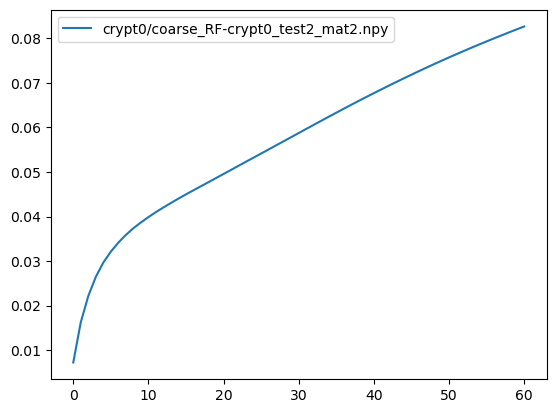

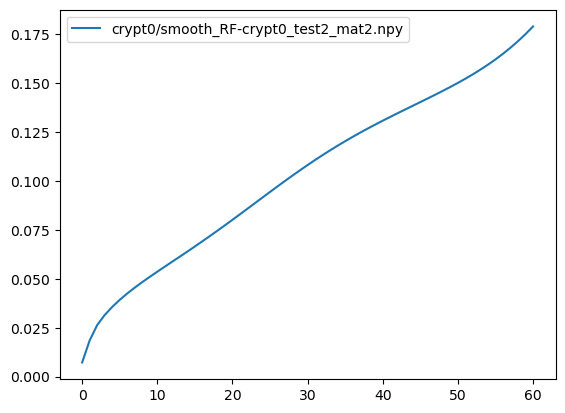

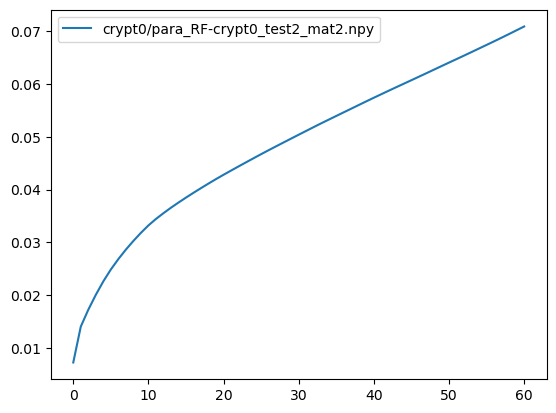

In [28]:
crypt_data_list[0][0].plot()
crypt_data_list[0][1].plot()
crypt_data_list[0][2].plot()

<AxesSubplot:>

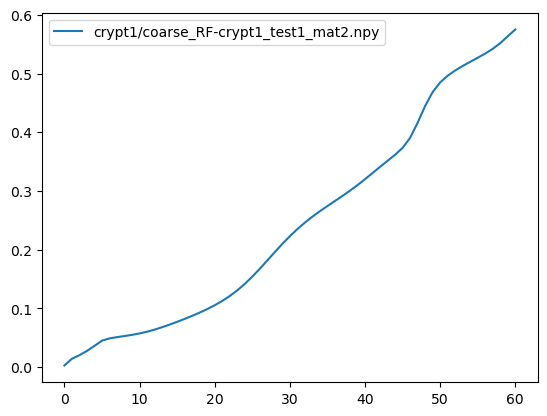

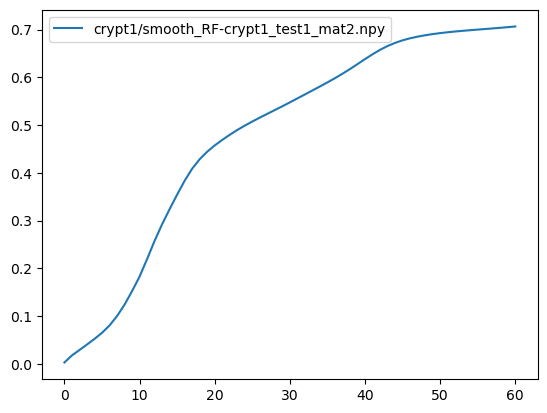

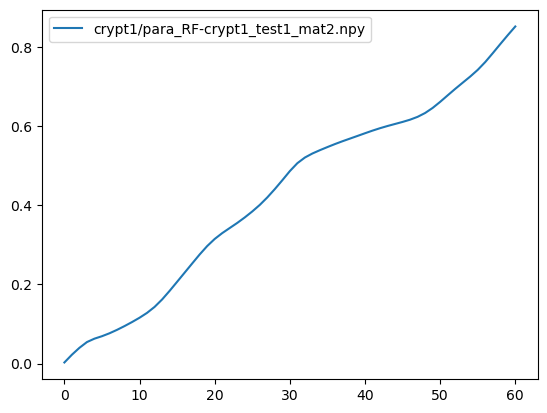

In [29]:
crypt_data_list[1][0].plot()
crypt_data_list[1][1].plot()
crypt_data_list[1][2].plot()

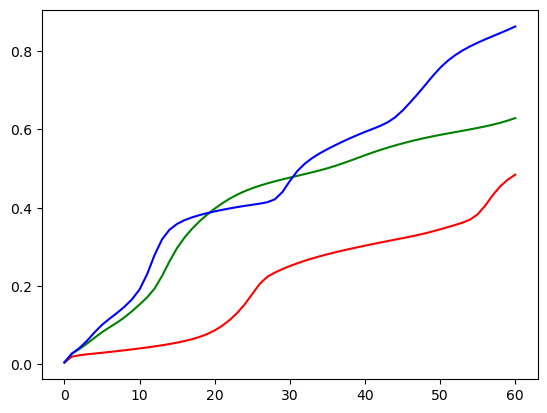

In [34]:
plt.plot(crypt_data_list[2][0], "r")
plt.plot(crypt_data_list[2][1], "g")
plt.plot(crypt_data_list[2][2], "b")

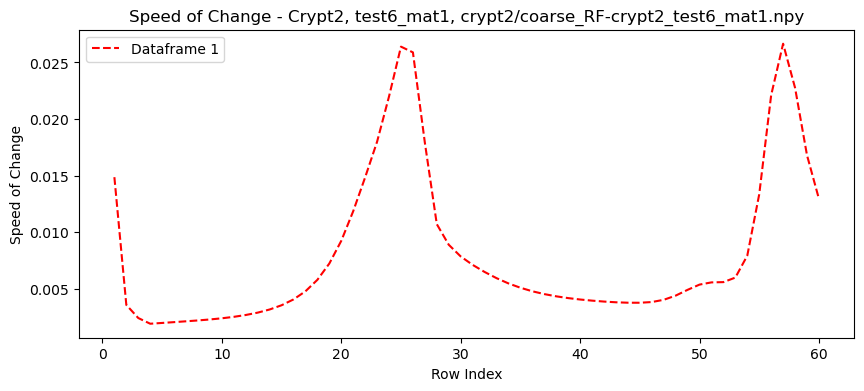

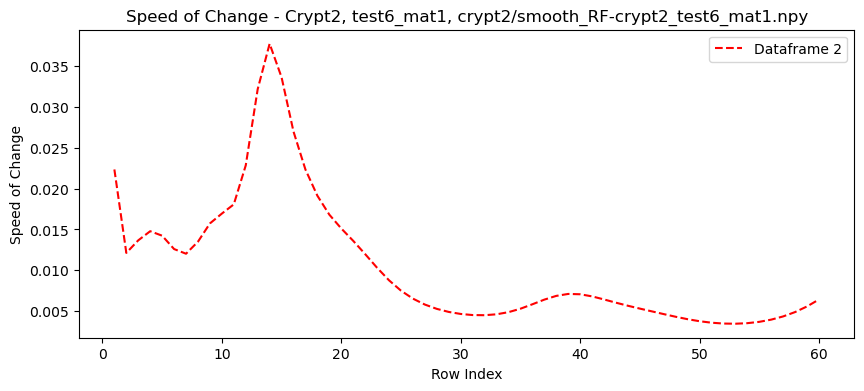

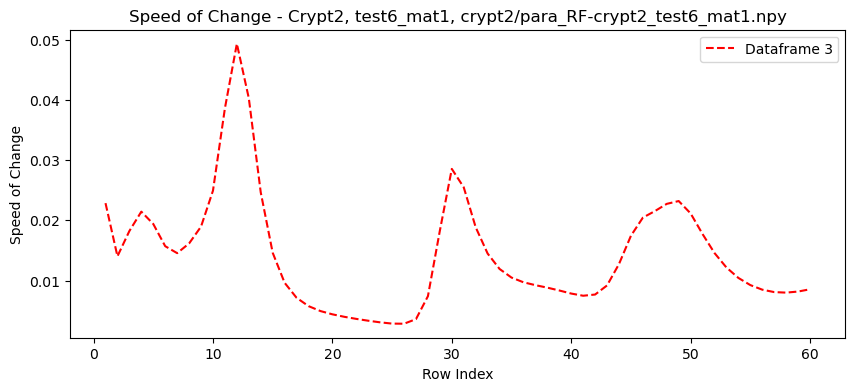

In [41]:
for i, dataframe in enumerate(crypt_data_list[2]):
    # Calculate the differences between consecutive values
    diffs = dataframe.diff().abs().mean(axis=1)
    # Plot the results
    plt.figure(figsize=(10, 4))
    plt.plot(diffs, color="r", linestyle="--",label=f'Dataframe {i + 1}')
    plt.title(f'Speed of Change - Crypt2, {test_names[2]}, {dataframe.columns[0]}')
    plt.xlabel('Row Index')
    plt.ylabel('Speed of Change')
    plt.legend()
    plt.show()

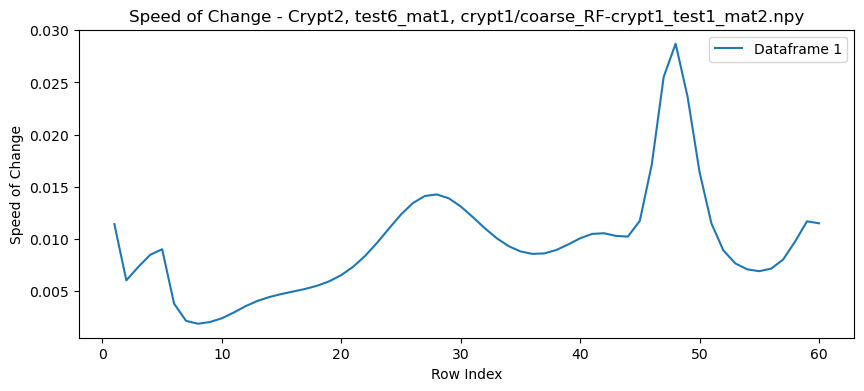

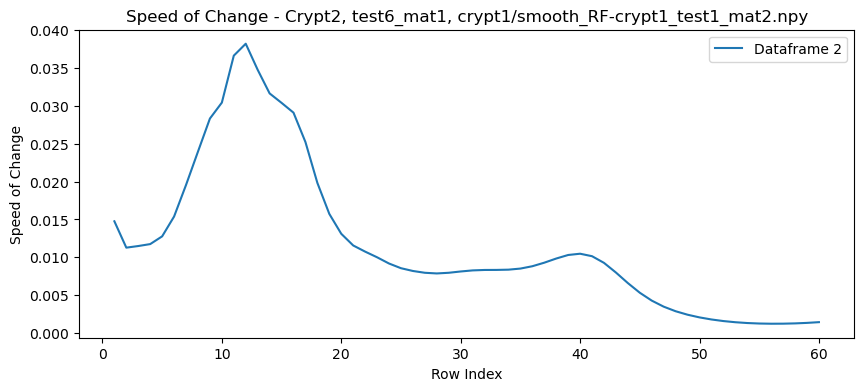

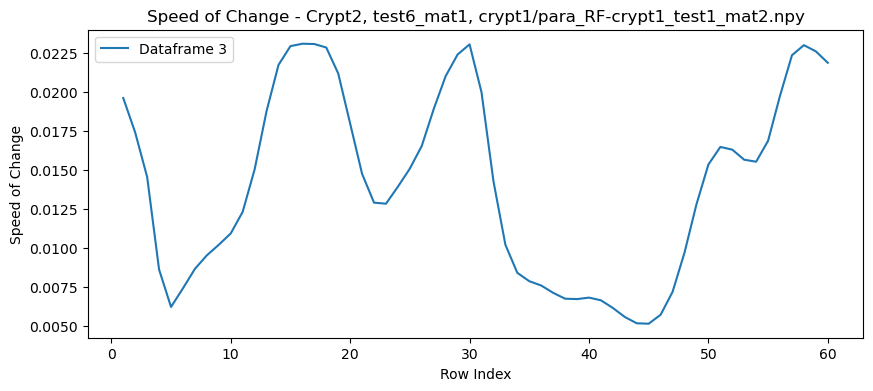

In [36]:
for i, dataframe in enumerate(crypt_data_list[1]):
    # Calculate the differences between consecutive values
    diffs = dataframe.diff().abs().mean(axis=1)

    # Plot the results
    plt.figure(figsize=(10, 4))
    plt.plot(diffs, label=f'Dataframe {i + 1}')
    plt.title(f'Speed of Change - Crypt2, {test_names[2]}, {dataframe.columns[0]}')
    plt.xlabel('Row Index')
    plt.ylabel('Speed of Change')
    plt.legend()
    plt.show()

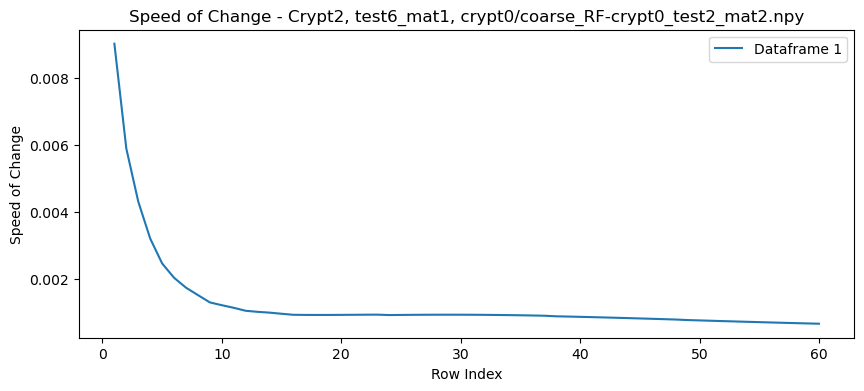

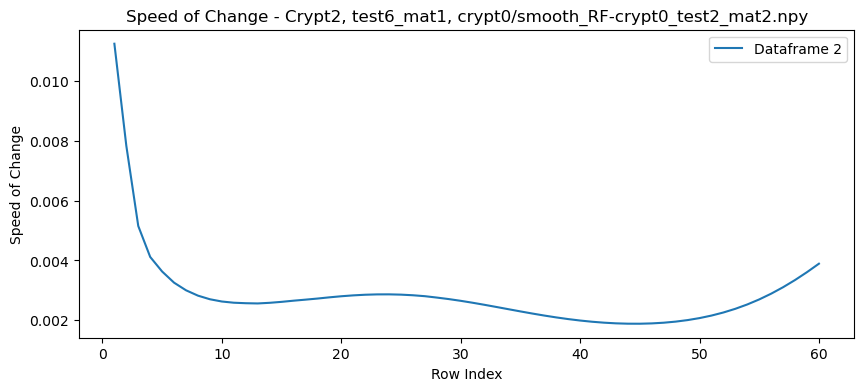

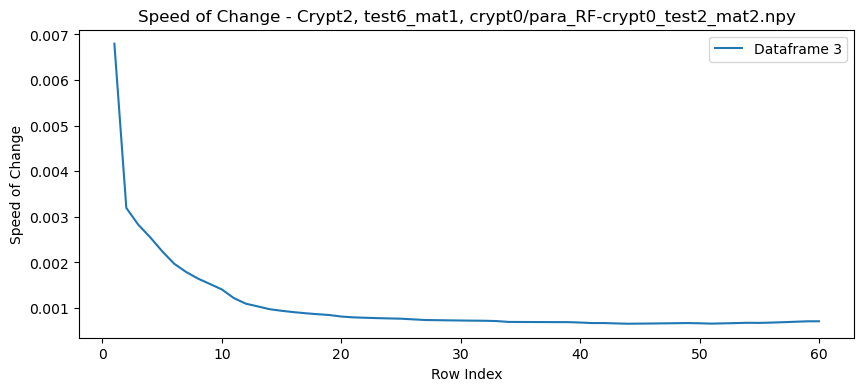

In [37]:
for i, dataframe in enumerate(crypt_data_list[0]):
    # Calculate the differences between consecutive values
    diffs = dataframe.diff().abs().mean(axis=1)

    # Plot the results
    plt.figure(figsize=(10, 4))
    plt.plot(diffs, label=f'Dataframe {i + 1}')
    plt.title(f'Speed of Change - Crypt2, {test_names[2]}, {dataframe.columns[0]}')
    plt.xlabel('Row Index')
    plt.ylabel('Speed of Change')
    plt.legend()
    plt.show()

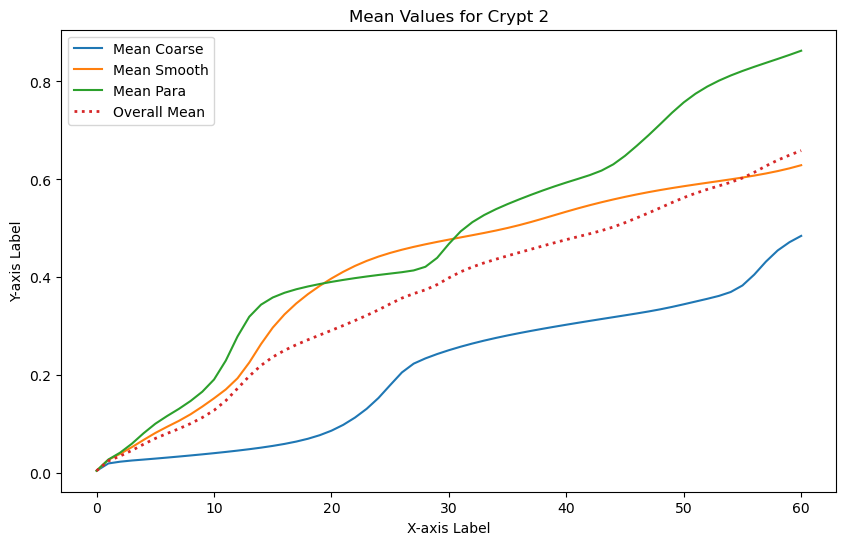

In [63]:
# Calculate the mean for each dataset
mean_coarse = np.mean(crypt_data_list[2][0], axis=1)
mean_smooth = np.mean(crypt_data_list[2][1], axis=1)
mean_para = np.mean(crypt_data_list[2][2], axis=1)

# Calculate the overall mean across all datasets
overall_mean = np.mean([mean_coarse, mean_smooth, mean_para], axis=0)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot the mean of coarse, smooth, and para
plt.plot(mean_coarse, label='Mean Coarse')
plt.plot(mean_smooth, label='Mean Smooth')
plt.plot(mean_para, label='Mean Para')

# Plot the overall mean
plt.plot(overall_mean, label='Overall Mean', linewidth=2, linestyle='dotted')

# Add labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Mean Values for Crypt 2')
plt.legend()

# Show the plot
plt.show()

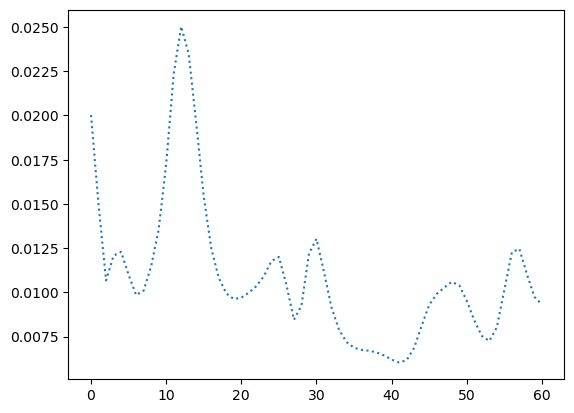

In [62]:
speed_of_change = np.gradient(overall_mean)
plt.plot(speed_of_change, label='Speed of Change', linestyle='dotted')

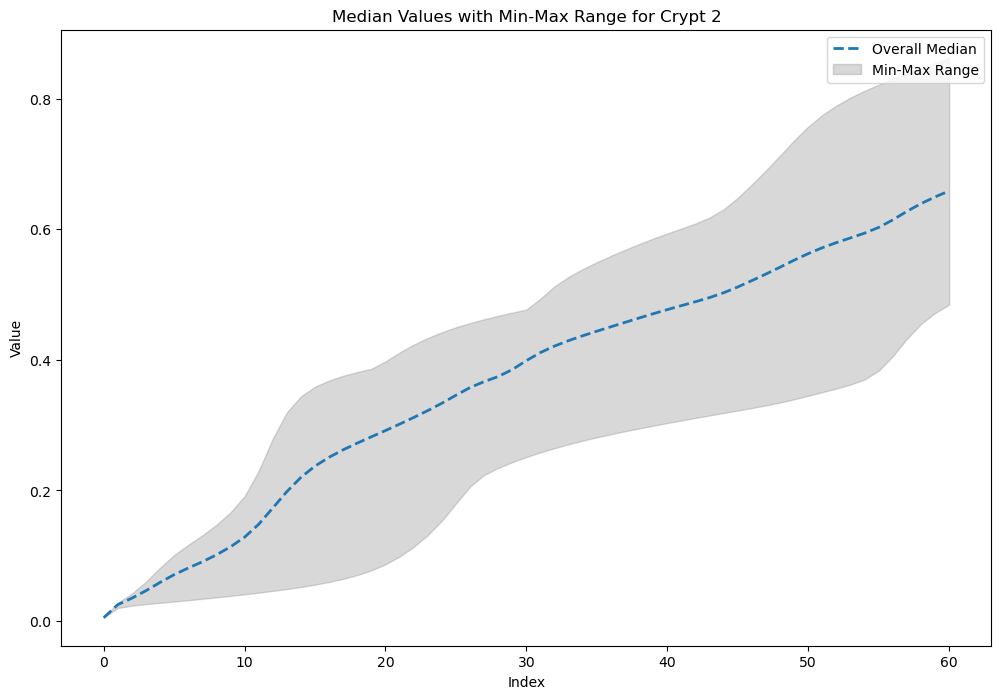

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming crypt_data_list[2] contains data for crypt 2

# Example:
# crypt_data_list[2] contains data for crypt 2

# Calculate the median for each dataset
median_coarse = np.median(crypt_data_list[2][0], axis=1)
median_smooth = np.median(crypt_data_list[2][1], axis=1)
median_para = np.median(crypt_data_list[2][2], axis=1)

# Calculate the overall median across all datasets
overall_median = np.median([median_coarse, median_smooth, median_para], axis=0)
overall_mean = np.mean([median_coarse, median_smooth, median_para], axis=0)

# Calculate the minimum and maximum values
min_values = np.min([median_coarse, median_smooth, median_para], axis=0)
max_values = np.max([median_coarse, median_smooth, median_para], axis=0)

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Plot the median of coarse, smooth, and para
# plt.plot(median_coarse, label='Median Coarse')
# plt.plot(median_smooth, label='Median Smooth')
# plt.plot(median_para, label='Median Para')

# Plot the overall median
plt.plot(overall_mean, label='Overall Median', linewidth=2, linestyle='dashed')

# Plot the shaded area between min and max
plt.fill_between(range(len(min_values)), min_values, max_values, color='gray', alpha=0.3, label='Min-Max Range')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Median Values with Min-Max Range for Crypt 2')
plt.legend()

# Show the plot
plt.show()

In [68]:
correlation_matrix = np.corrcoef([crypt_data_list[2][0], crypt_data_list[2][1], crypt_data_list[2][2]])

ValueError: m has more than 2 dimensions

In [83]:
from scipy.stats import ttest_ind

c2coarse = crypt_data_list[2][0]['crypt2/coarse_RF-crypt2_test6_mat1.npy']
c2smooth = crypt_data_list[2][1]['crypt2/smooth_RF-crypt2_test6_mat1.npy']
c2para = crypt_data_list[2][2]['crypt2/para_RF-crypt2_test6_mat1.npy']
# Example: t-test between Coarse and Smooth
t_stat, p_value = ttest_ind(c2coarse, c2smooth)#, axis=1)


In [84]:
p_value > 0.05

False

In [85]:
transposed_data = np.transpose([c2coarse, c2smooth, c2para])

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(transposed_data, rowvar=False)


In [92]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 6.7 MB/s eta 0:00:00 MB/s eta 0:00:01


In [93]:
import seaborn as sns

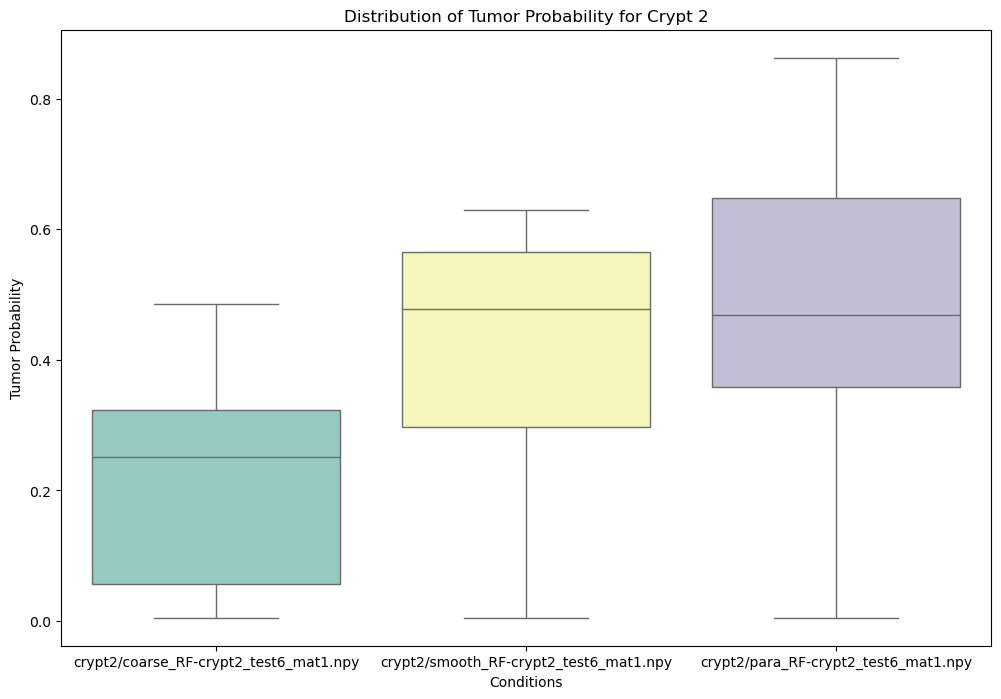

In [94]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=[c2coarse, c2smooth, c2para], palette="Set3")
plt.xlabel('Conditions')
plt.ylabel('Tumor Probability')
plt.title('Distribution of Tumor Probability for Crypt 2')
plt.show()

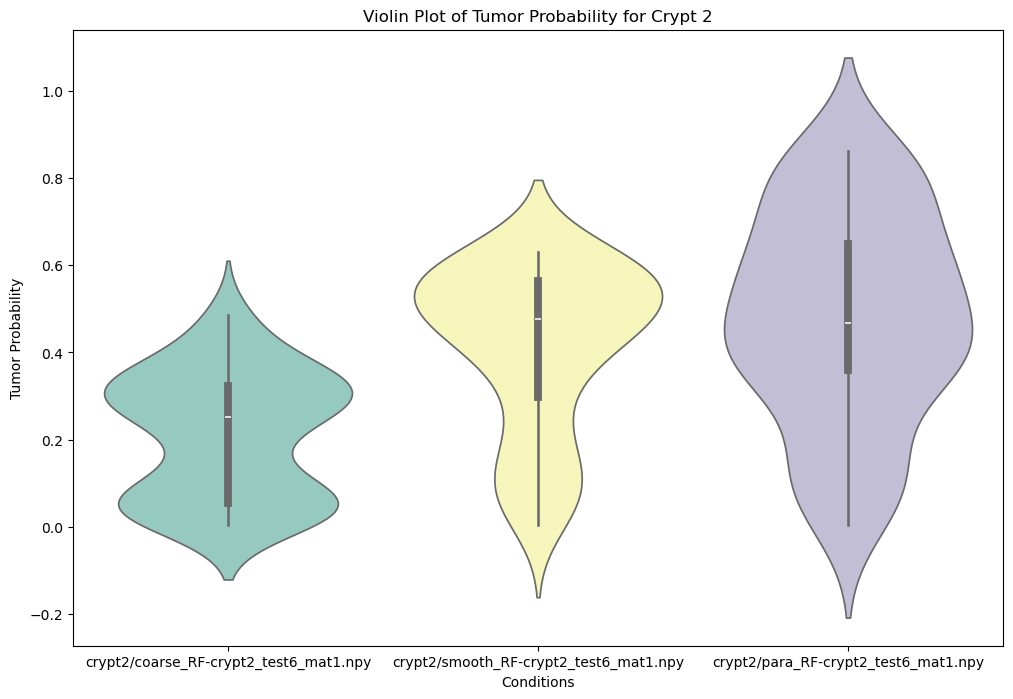

In [95]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=[c2coarse, c2smooth, c2para], palette="Set3")
plt.xlabel('Conditions')
plt.ylabel('Tumor Probability')
plt.title('Violin Plot of Tumor Probability for Crypt 2')
plt.show()


In [96]:
from scipy.stats import f_oneway

# One-way ANOVA to test for statistical differences
f_stat, p_value = f_oneway(c2coarse, c2smooth, c2para)
print(f'ANOVA F-statistic: {f_stat}, p-value: {p_value}')


ANOVA F-statistic: 30.432777996130444, p-value: 4.119101253420322e-12


In [97]:
correlation_matrix = np.corrcoef([c2coarse, c2smooth, c2para])
print('Correlation Matrix:')
print(correlation_matrix)


Correlation Matrix:
[[1.         0.91736298 0.94929921]
 [0.91736298 1.         0.95715108]
 [0.94929921 0.95715108 1.        ]]


In [99]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all data into a single array
all_data = np.concatenate([c2coarse, c2smooth, c2para])

# Create a grouping variable indicating the conditions
grouping = ['Coarse'] * len(c2coarse) + ['Smooth'] * len(c2smooth) + ['Para'] * len(c2para)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_data, grouping)

# Print the summary of the test
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Coarse   Para   0.2652    0.0  0.1814  0.349   True
Coarse Smooth   0.2005    0.0  0.1168 0.2843   True
  Para Smooth  -0.0647 0.1646 -0.1484 0.0191  False
---------------------------------------------------


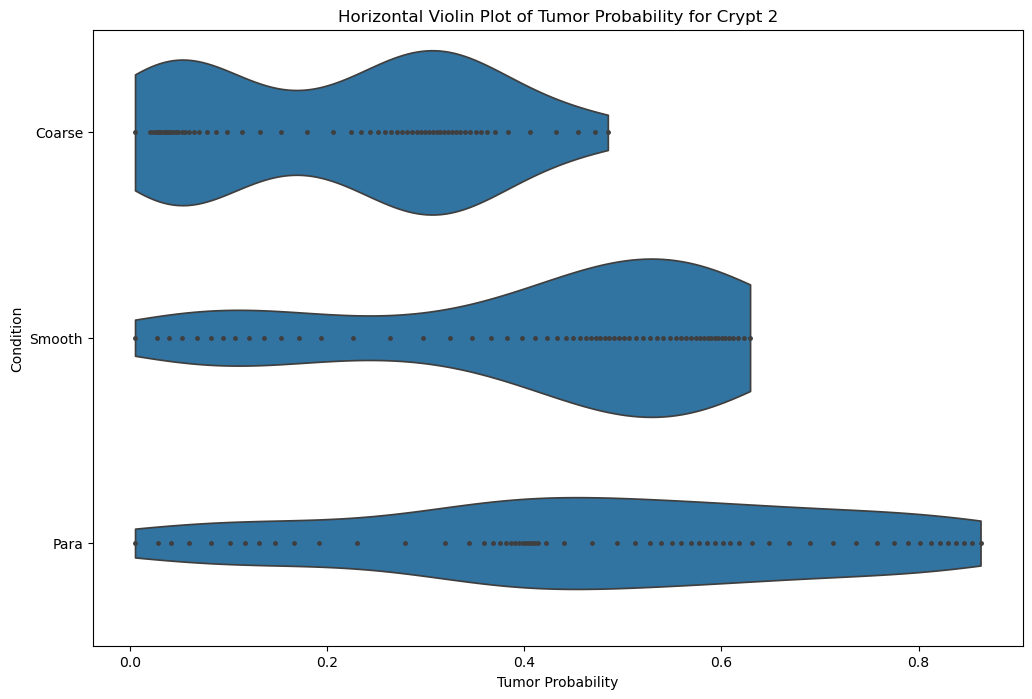

In [104]:
df = pd.DataFrame({'Condition': ['Coarse'] * len(c2coarse) + ['Smooth'] * len(c2smooth) + ['Para'] * len(c2para),
                   'Tumor Probability': np.concatenate([c2coarse, c2smooth, c2para])})

# Plot a horizontal violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Tumor Probability', y='Condition', data=df, inner='point', cut=0)
plt.xlabel('Tumor Probability')
plt.ylabel('Condition')
plt.title('Horizontal Violin Plot of Tumor Probability for Crypt 2')
plt.show()


In [105]:
sns.violinplot?